In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

In [3]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X2 = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno', 'agea', 'happy', 'tvtot'])]

# Make the categorical variable 'country' into dummies.
X2 = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X2.shape[0] * 0.8)

# Put 80% of the data in the training set.
X2_train, y_train = X2[:offset], y[:offset]

# And put 20% in the test set.
X2_test, y_test = X2[offset:], y[offset:]

In [8]:
print(X2)

      year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  gndr  \
0        6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   2.0   
1        6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   2.0   
2        6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   1.0   
3        6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   2.0   
4        6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   2.0   
6        6    3.0      0.0      5.0     2.0    0.0      2.0     2.0   1.0   
7        6    2.0      4.0      5.0     3.0   10.0      5.0     2.0   2.0   
8        6    2.0      8.0      8.0     8.0    9.0      6.0     4.0   2.0   
9        6    4.0      4.0      4.0     8.0    7.0      4.0     2.0   2.0   
10       6    1.0      6.0      7.0     7.0    9.0      5.0     2.0   2.0   
11       6    4.0      5.0      7.0     7.0    7.0      5.0     3.0   1.0   
12       6    4.0      7.0      7.0     4.0    9.0      6.0     2.0   1.0   

---

Gradient Boosting

Weak learner 0 R^2: 0.5964158585982571
Weak learner 20 R^2: 0.732048606849147
Weak learner 40 R^2: 0.732048606849147
Weak learner 60 R^2: 0.732048606849147
Weak learner 80 R^2: 0.732048606849147
Weak learner 100 R^2: 0.732048606849147


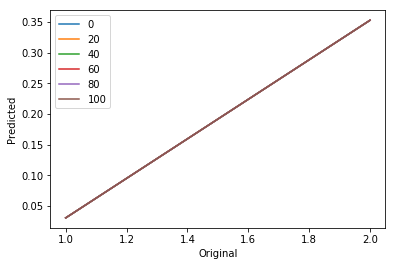

Overall R^2:
0.43322339049927755


In [5]:
# Store values from loops.
preds = pd.DataFrame()
labels = []

uniquex = df['partner'].unique()

# Iterate through decision trees, each time using the residuals
# from the previous tree as the inputs.
for m in range(0, 101):
    
    # Initialize and fit the tree. Set the max depth to 2.
    decision_tree = tree.DecisionTreeClassifier(max_depth=2)
    decision_tree.fit(X2,y)
    
    # Get and store predicted values.
    pred = decision_tree.predict(X2)
    preds['pred{}'.format(m)] = pred
    
    # Residuals.
    y = y - pred

    # Output every 20 iterations.
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X2, y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(df['partner'], bestpred, 1))(uniquex))
       
plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(df['partner'], predicted)[0, 1])

In [6]:
# We will make 800 iterations, use 4-deep trees, and set our loss function. 
params = {'n_estimators': 800,
         'max_depth': 4,
         'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X2_train, y_train)

predict_train = clf.predict(X2_train)
predict_test = clf.predict(X2_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.01258247659966242
Percent Type II errors: 0.08485499462943072

Test set accuracy:
Percent Type I errors: 0.08098159509202454
Percent Type II errors: 0.17116564417177915


In [7]:
# Set grid parameters
grid_params = {'n_estimators': [200, 500, 800, 1000],
         'max_depth': [2, 4, 6],}
# Use the grid
grid = GridSearchCV(clf, grid_params, cv=10, verbose=3)

#Fit the data
grid.fit(X2_train, y_train)

#return best parameters and best score for training model.
print('Best parameters for training model:')
print(grid.best_params_)
print('Best Score for training model:')
print(grid.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] max_depth=2, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... max_depth=2, n_estimators=200, score=0.769, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ....... max_depth=2, n_estimators=200, score=0.779, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ....... max_depth=2, n_estimators=200, score=0.744, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................
[CV] ....... max_depth=2, n_estimators=200, score=0.715, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................
[CV] ....... max_depth=2, n_estimators=200, score=0.718, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................
[CV] ....... max_depth=2, n_estimators=200, score=0.782, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................
[CV] ....... max_depth=2, n_estimators=200, score=0.782, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................
[CV] ....... max_depth=2, n_estimators=200, score=0.733, total=   0.5s
[CV] max_depth=2, n_estimators=200 ...................................
[CV] ....... max_depth=2, n_estimators=200, score=0.739, total=   0.6s
[CV] max_depth=2, n_estimators=200 ...................................
[CV] .

KeyboardInterrupt: 

---

Neural Networks

In [ ]:
# Import the model.

# Establish and fit the model, with a single, 100 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(100,))
mlp.fit(X2_train, y_train)

mlp.score(X2_train, y_train)

In [ ]:
cross_val_score(mlp, X2_train, y_train, cv=5)

In [ ]:
# Work on the test set.

# Let's see how the testing data performs.
mlp_pred = mlp.predict(X2_test)

confusion_matrix(y_test, mlp_pred)

In [ ]:
# Set parameters for mlp
mlp_params = [{'hidden_layer_sizes': [(100,4), (500,4), (1000,4)],
              'alpha': [.000001, .00001, .0001, .001, 1, 10],
              'max_iter': [200, 400, 600]}]

# Search for the best paramters. 
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5, verbose=2, n_jobs=-1)

# Fit the grid and obtain results
mlp_grid.fit(X2_train, y_train)

# Return best parameters and best score
print('Best parameters:')
print(mlp_grid.best_params_)
print('Best Score:')
print(mlp_grid.best_score_)

In [ ]:
mlp2 = MLPClassifier(hidden_layer_sizes=(500,4), alpha=1, max_iter=400)
mlp2.fit(X2_train, y_train)
mlp2.score(X2_train, y_train)

In [ ]:
cross_val_score(mlp2, X2_train, y_train, cv=5)

In [ ]:
mlp2_pred = mlp2.predict(X2_test)

confusion_matrix(y_test, mlp2_pred)

In [ ]:
mlp3 = MLPClassifier(hidden_layer_sizes=(1000,))
mlp3.fit(X2_train, y_train)

mlp3.score(X2_train, y_train)

In [ ]:
cross_val_score(mlp3, X2_train, y_train, cv=5)

In [ ]:
mlp3_pred = mlp3.predict(X2_test)

confusion_matrix(y_test, mlp3_pred)

In [ ]:
mlp4 = MLPClassifier(hidden_layer_sizes=(10000,))
mlp4.fit(X2_train, y_train)
mlp4.score(X2_train, y_train)

In [ ]:
cross_val_score(mlp4, X2_train, y_train, cv=5)

In [ ]:
mlp4_pred = mlp4.predict(X2_test)

confusion_matrix(y_test, mlp4_pred)